# PISA 2012 Project (Communicate Data Findings)

## by Jakub Revay

## Introduction
PISA - Programme for International Student Assessment- has gather an amazing and diverse data from 66 countries around the globe, including OECD and non OECD countries to preform possible studies, like this project were we dive indepth into  the Socio-Economic,Parental School EdUcation and the Wealth stats and their effect on Grades.  
The full 2012 PISA dataset to download [PISA2012](https://s3.amazonaws.com/udacity-hosted-downloads/ud507/pisa2012.csv.zip 'Download file' ).
additionally,a Dictionary companion was downloaded which describes each column information inthe PISA dataset.
The PISA data dictionary, which gives a brief explaination of each feature [PISADict](https://s3.amazonaws.com/udacity-hosted-downloads/ud507/pisadict2012.csv 'Download File').
the data given is collected in 2012 from students  born in 1996-1997, and the main PISA study was to check: 

- how well students have learned the school curriculum
- how well prepared they are for life beyond school.

thou we are going to study diffrent aspects, its good to know the main purpose of the original Project and its collected data.


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
colors = ['#1DA1F2','#f26e1d']
%matplotlib inline
plt.style.use('fivethirtyeight')
# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
#opening the new dataframe
df = pd.read_csv('pisaclean.csv') 

## Gender  stats & OECD Countries Percentile
#### looking at some fundemental stats, generally it seems there is not a noticable diffrence between genders, both are almost equal yet almost 60% of the data comes from OECD countries, will be intresting to see these 2  country groups effects  

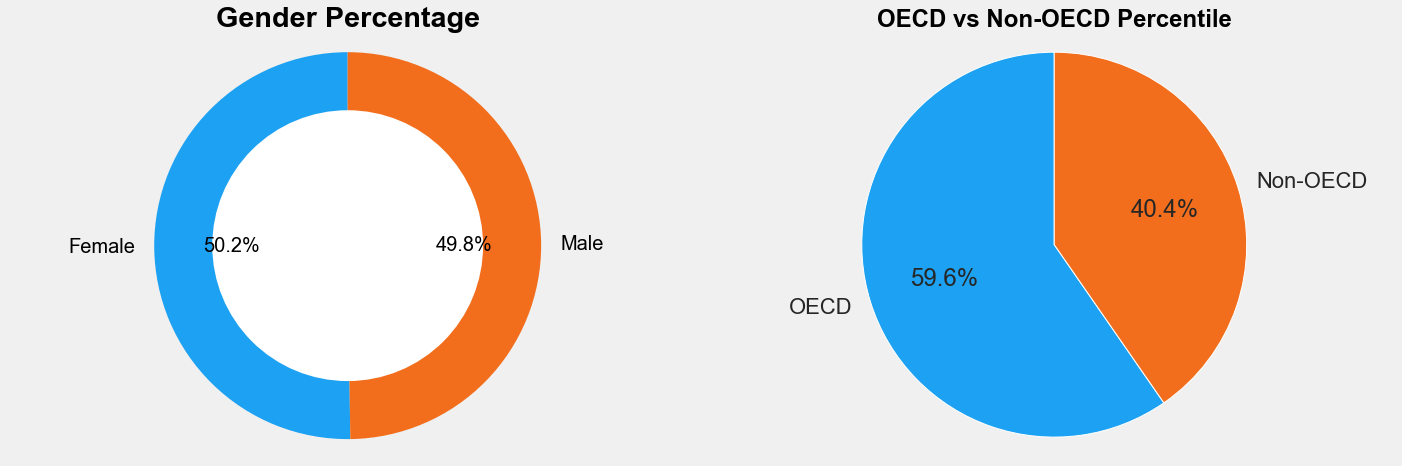

In [3]:
#plotting a dount with gender percentage 
plt.figure(figsize = [20,7])
plt.subplot(1,2,1)

economic_index = (df.groupby('gender')['grade'].mean()).sort_values(ascending=False)
plt.rcParams.update({'font.size': 20})
plt.pie(economic_index.values,  labels= economic_index.index, autopct='%1.1f%%', startangle=90 , colors = colors)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.axis('equal')  
plt.tight_layout()
plt.title('Gender Percentage', weight = 'bold')

#plotting a pie chart with percentile 
plt.subplot(1,2,2)
OECD = df.OECD.value_counts()
sb.set(font_scale = 2)
plt.pie(OECD.values,  labels= OECD.index, autopct='%1.1f%%', startangle=90 , colors = colors )
plt.axis('equal')  
plt.tight_layout()
plt.title('OECD vs Non-OECD Percentile', weight = 'bold');

## Gender wealth gap per Grade
#### how the wealth index varies between genders per Grade ? it seems there is a general wealth gap between males and females which goes along for each grade. would wealth index have any effect on grade ? 

Text(0, 0.5, 'Wealth')

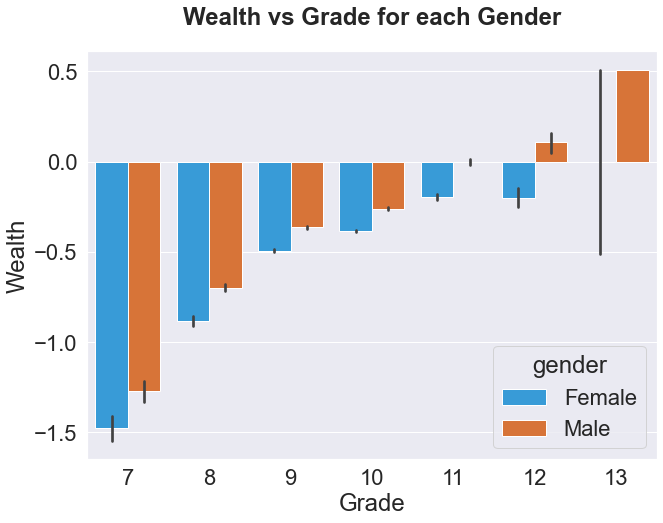

In [4]:
#plotting gender wealth and grades
plt.figure(figsize = [20, 7])
plt.subplot(1,2,1)
sb.set(font_scale = 2)
sb.barplot(data=df, x='grade', y='wealth', hue= 'gender', palette = colors);
plt.title('Wealth vs Grade for each Gender', y= 1.05 , weight = 'bold')
plt.xlabel('Grade')
plt.ylabel('Wealth')

## Grade vs Wealth Regression  

#### how much can wealth have and Impact on grades  , looks there is a slight and almost neglectable positive regssion between the two, stating that wealth doesnt have a big impact on grades. most grades fall in 9 or 10 Grade  

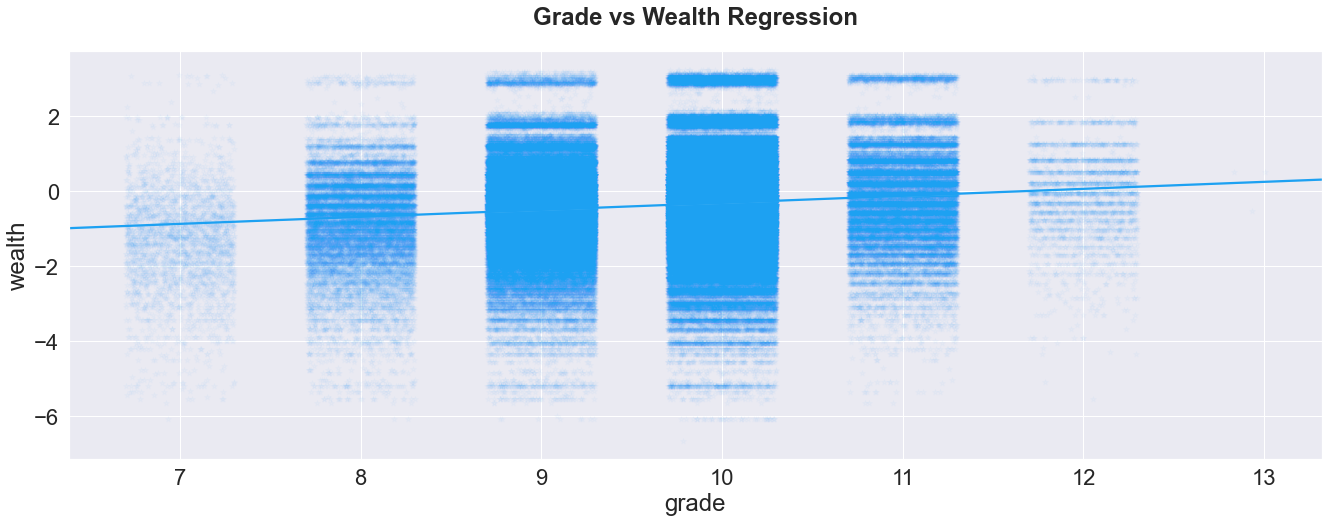

In [5]:
# regression plot between grade and wealth 

plt.figure (figsize = [20,7])
sb.set(font_scale = 2)
sb.regplot(y= 'wealth', x='grade', data = df,marker = '*', color ='#1DA1F2' ,
           truncate=False, x_jitter=0.3, scatter_kws={'alpha':1/40});
plt.title('Grade vs Wealth Regression', y = 1.05 , weight = 'bold');

## Wealth vs Socio-Economic Regression 
#### correlation between Wealth and Socio-Economic status , and  as logically expected, there is a pretty strong positive correlation between the two, can it also mean that Socio-Economic staus have little if any impact on grades ? 

Text(0.5, 0, 'Wealth Index')

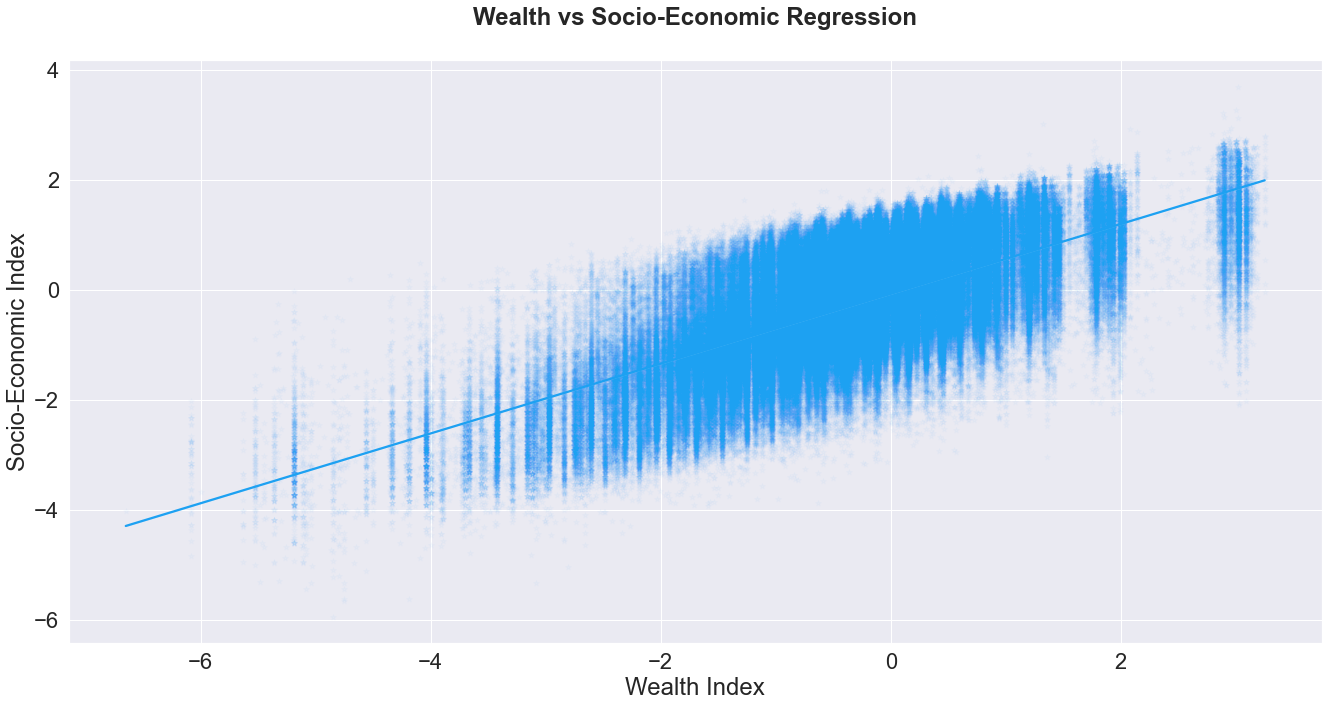

In [6]:
# regression plot between wealth and economic soacial index 
plt.figure (figsize = [20,10])
sb.set(font_scale = 2)
sb.regplot(x= 'wealth', y='economic_social_index', data = df,marker = '*', color ='#1DA1F2', scatter_kws={'alpha':1/40} );
plt.title('Wealth vs Socio-Economic Regression', y = 1.05 , weight = 'bold');
plt.ylabel('Socio-Economic Index')
plt.xlabel('Wealth Index')

## Parents School  Education  vs Grade
#### parents Education level per grade - 3A-ready for theoretical university, 3B-ready for thechnical/occupation, the rest as stated
#### the higher the education level of the parents the better grades students have, 2 observation are  intresting 
#### - 3A educated mothers have higher count of good grade students! 
#### - surpisingly secondary education parents slighly outpreform 3B educated parents wich are in a higher education class!
#### which let us conclude that best grades come from, 3A educated parents by far, followed by Secondary educated.**

In [7]:
#creating a face_grid function 
'''
face_grit will create 2 Facegrids f/m
maping each grid with col1 or col2 
to create a histogram with bcol as the X axis, 
finally ylim will set the plots y axis min and max values

'''
# defining face_grid function
def facet_grid (col1,bcol,ylim, colors):
    sb.set(font_scale = 1)
    f = sb.FacetGrid(data = df, col = col1 )
    f.set(ylim=(0, ylim ))
    f.map(plt.hist, bcol , bins = 6,color = colors )
    f.axes[0,0].set_ylabel('Student count')
    

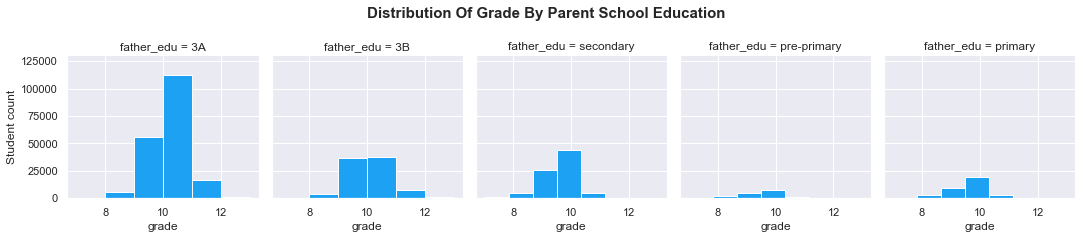

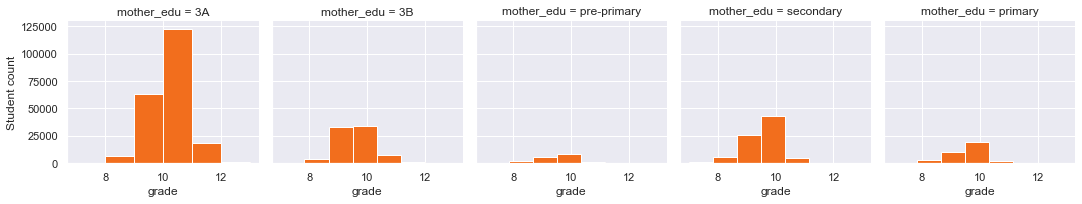

In [23]:
# appling education columns, grade to the funciton 

f=facet_grid('father_edu','grade',130000,colors[0])
plt.suptitle('Distribution of Grade by Parent School Education '.title(), y= 1.1 , fontsize = 15, weight = 'bold' );
ma = facet_grid('mother_edu','grade',130000,colors[1])


In [9]:
'''
creating a demo dataframe 'df2'
turning all qualtitive into quantitive 
each exact change is mentioned above each line of code 
'''

# create a new dataframe copy, named df2 
df2 = df.copy()

# sorting parents education from 1-5 as 5 is highest schooling  
df2['father_edu'] = df['father_edu'].replace({'3A':5, '3B':4,'secondary':3,'primary':2,'pre-primary':1}) 
df2['mother_edu'] = df['mother_edu'].replace({'3A':5, '3B':4,'secondary':3,'primary':2,'pre-primary':1}) 


# sorting parents work from 1-4 as 4 is full time worker   
df2['father_work'] = df2['father_work'].replace({ 'full-time' : 4, 'part-time':3,'other':2, 'job-search':1})
df2['mother_work'] = df2['mother_work'].replace({ 'full-time' : 4, 'part-time':3,'other':2, 'job-search':1})

# Turning OECD into 1 and Non OECD into 0 
df2['OECD'] = df2['OECD'].replace({'OECD': 1 , 'Non-OECD':0})

# turning male into 1 female into 0 
df2['gender'] = df2['gender'].replace({'Male': 1 , 'Female':0})

## Full Heatmap Demo
**lets go wild for a bit, making a demo dataframe ,turn all qualtitive into quantitive and find correllations using a 1 Heatmap.**
**going all in on a ful heat map shows some intresting results, some we already expected, some not yet this plot make it clear how all the data is correlated.**

**althoug wealth and economic index are pretty correlated, wealth and parents school education and not, yet socia economic index is! another correlation observed  is betweenm fathers and mothers education**

**to cuncoled here, we didint find any parameter that can suggest to have an clear impact on the Grade**  

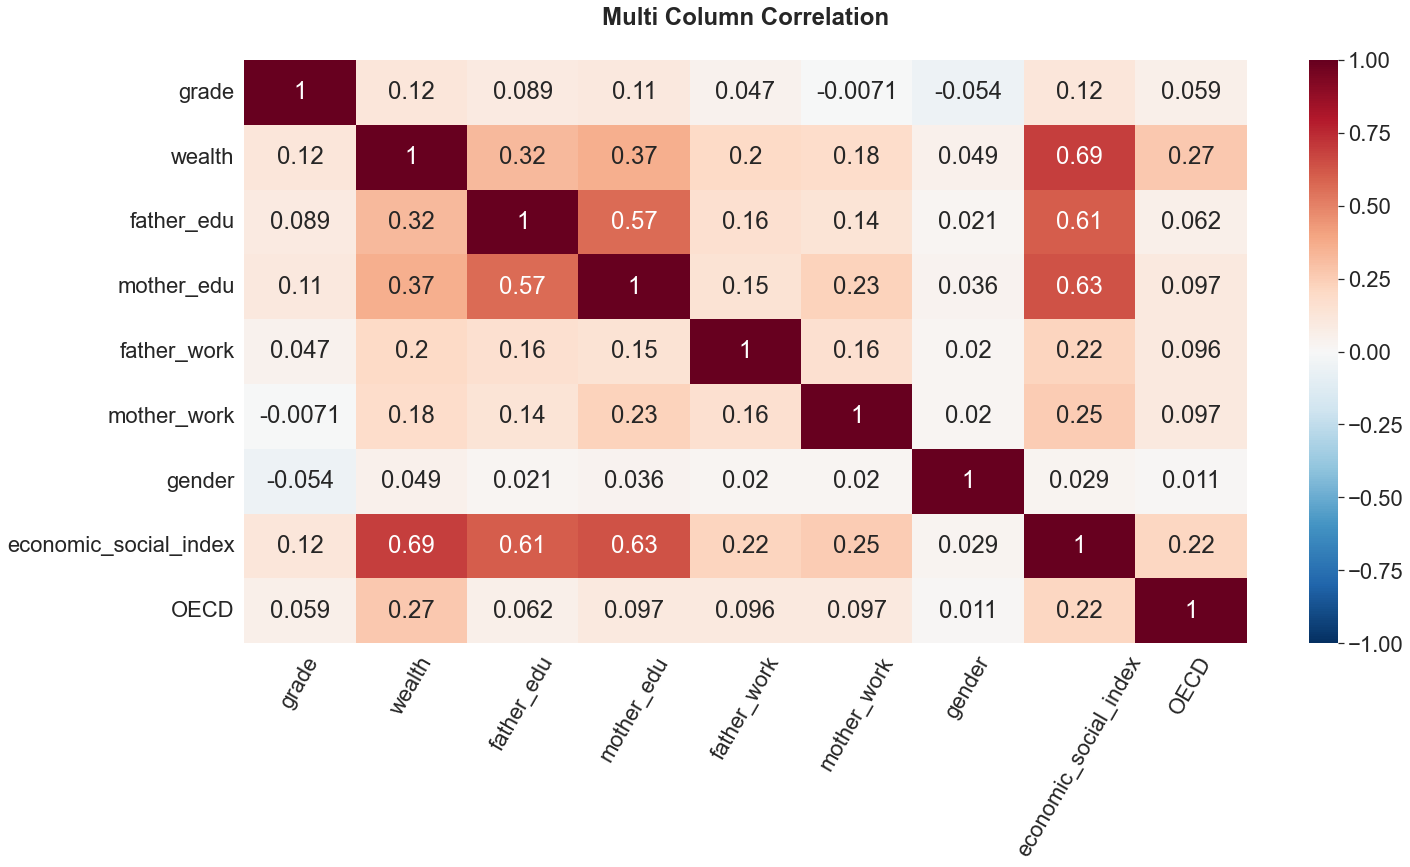

In [10]:
'''
plotting a heat map using all the columns the were 
changed in the previos block
'''

# plotting a heatmap for both parents education, along with wealth, grade, and Socio Economimc index 
plt.figure(figsize = [20,10])
sb.set(font_scale = 2)
chart = sb.heatmap(data=df2[['grade','wealth','father_edu','mother_edu','father_work','mother_work','gender','economic_social_index','OECD']].corr(),
           center=0, cmap='RdBu_r',annot=True, vmin= -1, vmax=1, )
chart.set_yticklabels(chart.get_yticklabels(), rotation=0 );
chart.set_xticklabels(chart.get_xticklabels(), rotation=60 );
plt.title('Multi Column Correlation', y = 1.05, weight= 'bold');

## Wealth vs Grade in OECD/ Non OECD Countries
**wealth varies alot in Non-OECD countries for each given grade,where OECD countries are a bit more condense.
as we get higher in grades, countries have a slightly higher wealth index, thus very low correlated but still,excluding grade 12,where NonOECD countries have a lower wealth index for a significat high grade!
this plots shows us that OECD countries are wealthier and have a higher chance to get high grades.** 

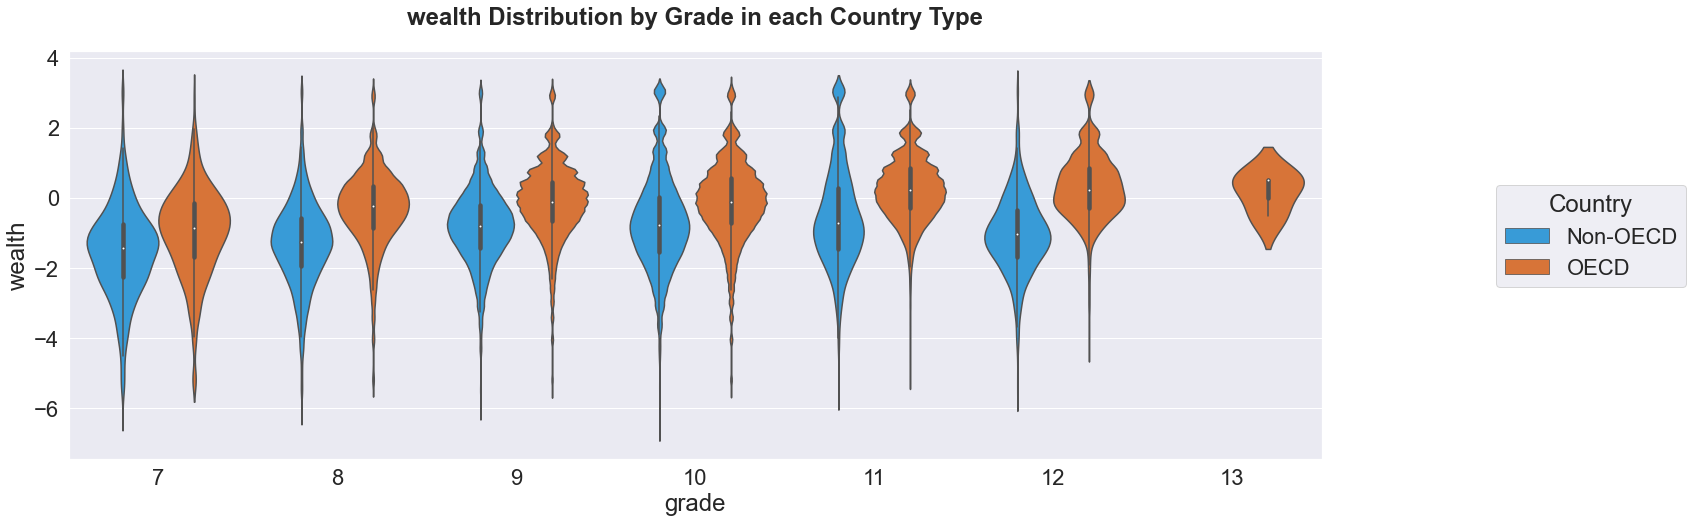

In [11]:
# Grade and wealth violin plot in OECD and Non-OECD countries

plt.figure(figsize=[20,7])
sb.set(font_scale = 2)

ax = sb.violinplot(x="grade", y="wealth", hue="OECD",
                    data=df, inner = 'box' , palette=colors )
ax.legend( title = 'Country', bbox_to_anchor=(1.3,0.7));
plt.title('wealth Distribution by Grade in each Country Type', y = 1.05, weight= 'bold');

In [12]:
!jupyter nbconvert PISA2012Part_II_slides.ipynb --to slides --post serve --no-input --no-prompt


^C
